# 1.  Import the spam dataset and print the first six rows.  

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl

In [2]:
spam = pd.read_csv('spam_dataset.csv')
spam.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# 2.  Visualize the univariate distribution of each of the variables

In [4]:
#Create a histogram for word_freq_free
from matplotlib import pyplot as plt 
spam['word_freq_free:'].hist(bins=10)
plt.xlabel('Total number of word "free" in e-mail')
plt.ylabel('Count')
plt.title('Distribution of word "free"')

Text(0.5, 1.0, 'Distribution of word "free"')

Text(0.5, 1.0, 'Distribution of character "!"')

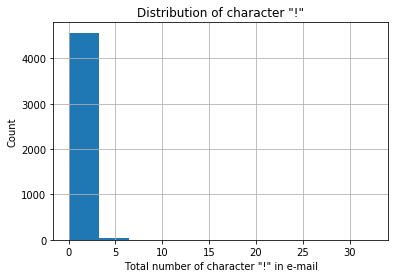

In [5]:
#Create a histogram for char_freq_!
from matplotlib import pyplot as plt 
spam['char_freq_!:'].hist(bins=10)
plt.xlabel('Total number of character "!" in e-mail')
plt.ylabel('Count')
plt.title('Distribution of character "!"')

Text(0.5, 1.0, 'Distribution of length of longest uninterrupted sequence of capital letters')

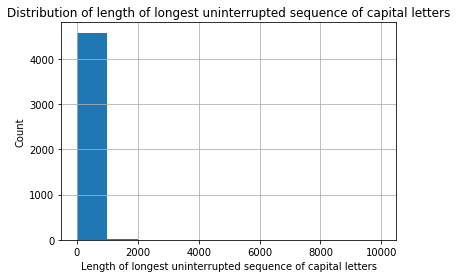

In [6]:
#Create a histogram for capital_run_length_longest:
from matplotlib import pyplot as plt 
spam['capital_run_length_longest:'].hist(bins=10)
plt.xlabel('Length of longest uninterrupted sequence of capital letters')
plt.ylabel('Count')
plt.title('Distribution of length of longest uninterrupted sequence of capital letters')

# 3.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

KNN model

In [11]:
# Select the three variables
df = spam[['word_freq_free:', 'char_freq_!:','capital_run_length_longest:','spam']]
df.head()

,word_freq_free:,char_freq_!:,capital_run_length_longest:,spam
0,0.32,0.778,61,1
1,0.14,0.372,101,1
2,0.06,0.276,485,1
3,0.31,0.137,40,1
4,0.31,0.135,40,1


In [12]:
#Change variable names to X, y to create train/test split
y = df['spam']
X = df.loc[:, df.columns != 'spam']

X.head()

,word_freq_free:,char_freq_!:,capital_run_length_longest:
0,0.32,0.778,61
1,0.14,0.372,101
2,0.06,0.276,485
3,0.31,0.137,40
4,0.31,0.135,40


In [13]:
#Train test split
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,word_freq_free:,char_freq_!:,capital_run_length_longest:
1173,1.23,1.939,8
1954,0.00,0.000,13
256,0.00,0.931,117
3341,0.14,0.014,26
4469,0.00,0.000,2


In [14]:
#Determine the best k-value by plotting the error rate graph
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

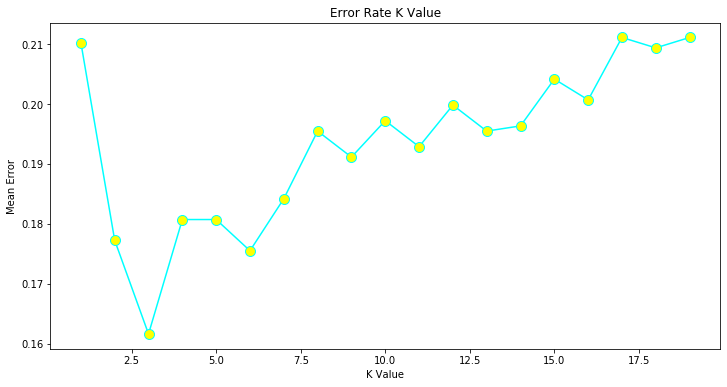

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20,1), error, color='cyan', linestyle='solid', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The best k value is 3 from the graph. 

a) Run the model and evaluate prediction error on test data directly

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Print accuracy rounded to four digits to the right of decimal
print("accuracy: {:.4f}".format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test) 
#The error is 0.1564

accuracy: 0.8384


b) Run the model and evaluate prediction error using k-fold cross-validation.

In [17]:
#import cross validation functions from sk learn

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

# Set up function parameters for diff't cross validation strategies
kfold = KFold(n_splits=5)

print("KFold:\n{:.4f}".format(
cross_val_score(KNeighborsClassifier(), X, y, cv=kfold).mean()))
#The error is 0.2816

KFold:
0.7184


Logistic regression.

In [18]:
#Choose the best C for logistic regression using GridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_params = {'C':[0.01,1,100,10000,1e90]} 

log_grid = GridSearchCV(LogisticRegression(solver='lbfgs', tol=1, max_iter=1000), param_grid=log_params, cv=5) 
log_grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.4f}".format(log_grid.best_score_))
print("best parameters: {}".format(log_grid.best_params_))
print("test-set score: {:.4f}".format(log_grid.score(X_test, y_test)))

best mean cross-validation score: 0.7896
best parameters: {'C': 100}
test-set score: 0.7906


The best C value is 100.

a) Run the model and evaluate prediction error on test data directly

In [19]:
#The accuracy is 0.7896, so the error is 0.2104

b) Run the model and evaluate prediction error using k-fold cross-validation.

In [20]:
kfold = KFold(n_splits=5)

print("KFold:\n{:.4f}".format(
cross_val_score(LogisticRegression(solver='lbfgs'), X, y, cv=kfold).mean()))
#The error is 0.2929

KFold:
0.7071


This model does not predict the test data better than the previous model.

Random Forest

In [21]:
#Choose the best n_estimator for random forest using GridCV
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators':[100,1000,1]} 

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5) 
rf_grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.4f}".format(rf_grid.best_score_))
print("best parameters: {}".format(rf_grid.best_params_))
print("test-set score: {:.4f}".format(rf_grid.score(X_test, y_test)))

best mean cross-validation score: 0.8658
best parameters: {'n_estimators': 100}
test-set score: 0.8619


The best n_estimators is 100.

a) Run the model and evaluate prediction error on test data directly

In [22]:
#The prediction accuracy is 0.8664, so error is 0.1336

b) Run the model and evaluate prediction error using k-fold cross-validation.

In [23]:
kfold = KFold(n_splits=5)

print("KFold:\n{:.4f}".format(
cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=kfold).mean()))
#The error is 0.2019

KFold:
0.7968


The random forest model predicts test set better than other models.

Support Vector Classifier

In [25]:
#Choose the best n_estimator for SVC using GridCV
from sklearn.svm import SVC

svc_params = {'C':[1,5,10,50]} 

svc_grid = GridSearchCV(SVC(kernel='linear',gamma='scale'), param_grid=svc_params, cv=5) 
svc_grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.4f}".format(svc_grid.best_score_))
print("best parameters: {}".format(svc_grid.best_params_))
print("test-set score: {:.4f}".format(svc_grid.score(X_test, y_test)))

best mean cross-validation score: 0.7986
best parameters: {'C': 50}
test-set score: 0.8010


The best C value is 50.

a) Run the model and evaluate prediction error on test data directly

In [ ]:
#The accuracy is 0.7986 so the error is 0.2014

b) Run the model and evaluate prediction error using k-fold cross-validation.

In [26]:
kfold = KFold(n_splits=5)

print("KFold:\n{:.4f}".format(
cross_val_score(SVC(kernel='linear',gamma='scale', C= 50), X, y, cv=kfold).mean()))
#The error is 0.2736

KFold:
0.7264


The model is better than logistic but worse than the other models.